# Gaussian classification

Ok now we explored the gaussian distribution, let's use it for classification by having a distribution for each class (label) in a supervised learning problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class GaussianClassifier:
    def __init__(self):
        self.classes = None
        self.means = {}
        self.covariances = {}
        self.priors = {}

    def fit(self, X, y):
        # we can create a distribution for each class
        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.covariances[cls] = np.cov(X_cls, rowvar=False)
            self.priors[cls] = X_cls.shape[0] / X.shape[0]

    def _multivariate_gaussian(self, x, mean, cov):
        size = len(x)

        # normalisation constant (look online for derivation - its a bit long)
        det_cov = np.linalg.det(cov)
        norm_const = 1.0 / (np.power((2 * np.pi), size / 2) * np.sqrt(det_cov))
        
        # exponent
        x_mu = x - mean
        inv_cov = np.linalg.inv(cov)
        result = np.exp(-0.5 * (x_mu @ inv_cov @ x_mu.T))
        return norm_const * result

    def predict(self, X):
        predictions = []
        # pick the class with the highest probability as the label
        for x in X:
            class_probs = {}
            for cls in self.classes:
                likelihood = self._multivariate_gaussian(x, self.means[cls], self.covariances[cls])
                class_probs[cls] = likelihood * self.priors[cls]
            predicted_class = max(class_probs, key=class_probs.get)
            predictions.append(predicted_class)
        return np.array(predictions)

Accuracy: 94.67%


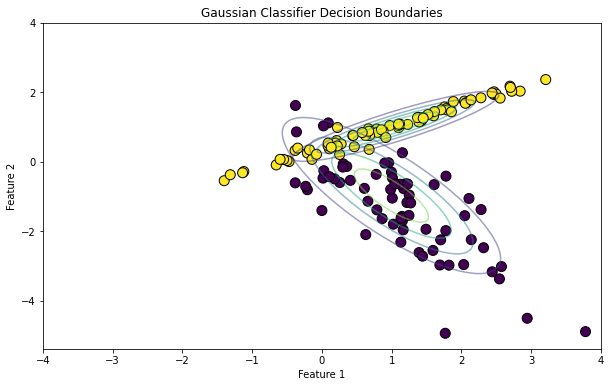

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SAMPLES = 500
FEATURES = 2
CLASSES = 2
USEFUL_FEATURES = FEATURES 

# fake data that gas 2 features and 2 classes
X, y = make_classification(n_samples=SAMPLES, n_features=FEATURES, n_informative=USEFUL_FEATURES, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X1, X2 = np.meshgrid(x, y)
pos = np.dstack((X1, X2))

plt.figure(figsize=(10, 6))
for cls in model.classes:
    mean = model.means[cls][:2]
    cov = model.covariances[cls][:2, :2]
    Z = np.array([[model._multivariate_gaussian(np.array([x1, x2]), mean, cov) for x1 in x] for x2 in y])
    plt.contour(X1, X2, Z, levels=5, cmap='viridis', alpha=0.5)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title("Gaussian Classifier Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()